mport Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


Load Dataset

In [2]:
#This tells pandas to read the file in one go and figure it out better:

df = pd.read_csv("Aviation_Data.csv", low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Exploratory Data Analysis (EDA)

In [3]:
df.shape

(90348, 31)

In [4]:
# Structure of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Summary statistics
df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Event.Id                   1459
Accident.Number            1459
dtype: int64

In [7]:
# Top aircraft makes and models
print("Top Makes:\n", df['Make'].value_counts().head(10))
print("Top Models:\n", df['Model'].value_counts().head(10))


Top Makes:
 Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64
Top Models:
 Model
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: count, dtype: int64


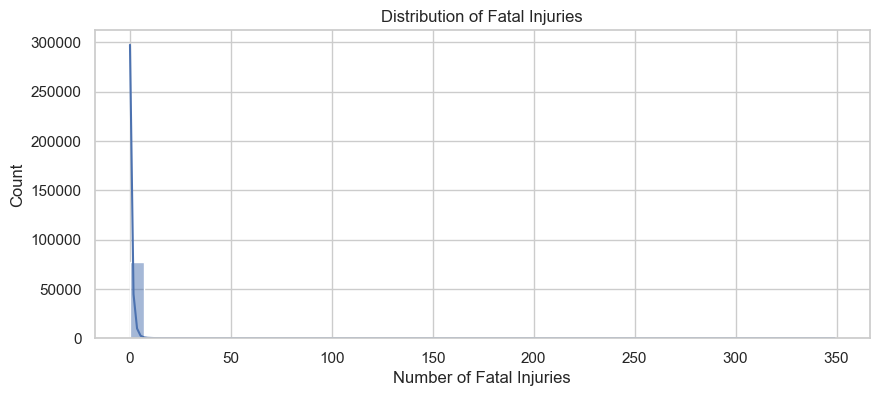

In [8]:
# Distribution of fatal injuries
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')
plt.figure(figsize=(10, 4))
sns.histplot(df['Total.Fatal.Injuries'].dropna(), bins=50, kde=True)
plt.title('Distribution of Fatal Injuries')
plt.xlabel('Number of Fatal Injuries')
plt.show()


Clean Column Names

In [9]:
#Rename Columns for Consistency

df.columns = df.columns.str.strip().str.lower().str.replace('.', '_').str.replace(' ', '_')

# Check again
print(df.columns.tolist())

['event_id', 'investigation_type', 'accident_number', 'event_date', 'location', 'country', 'latitude', 'longitude', 'airport_code', 'airport_name', 'injury_severity', 'aircraft_damage', 'aircraft_category', 'registration_number', 'make', 'model', 'amateur_built', 'number_of_engines', 'engine_type', 'far_description', 'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured', 'weather_condition', 'broad_phase_of_flight', 'report_status', 'publication_date']


Drop Irrelevant Columns

In [10]:
df.drop(columns=[
    'event_id', 'accident_number', 'registration_number',
    'airport_code', 'airport_name', 'latitude', 'longitude'
], inplace=True)

Convert Dates to datetime

In [11]:
# Convert dates
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
df = df[df['event_date'].notnull()]

Fill Missing Categorical Columns with "Unknown"

In [12]:
cat_cols = ['injury_severity', 'aircraft_damage', 'aircraft_category',
            'amateur_built', 'engine_type', 'weather_condition',
            'broad_phase_of_flight', 'report_status', 'purpose_of_flight']

# Replace all missing categorical values with 'Unknown'
df[cat_cols] = df[cat_cols].fillna('Unknown')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17284\1370319751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].fillna('Unknown')


Fill Missing Injury Numbers with 0

In [13]:
injury_cols = [
    'total_fatal_injuries', 'total_serious_injuries',
    'total_minor_injuries', 'total_uninjured'
]

for col in injury_cols:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


In [14]:
# Convert injury-related fields to numeric, fill missing values with 0
for col in ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17284\4241768625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


Drop Rows with Missing Aircraft Info

In [15]:
df = df.dropna(subset=['make', 'model'])

In [16]:
df['accident_id'] = df.index + 1

Create Severity Score

In [17]:
df['severity_score'] = (
    df['total_fatal_injuries'] * 3 +
    df['total_serious_injuries'] * 2 +
    df['total_minor_injuries'] * 1
)
df

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,...,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,accident_id,severity_score
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1,6.0
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,2,12.0
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,Cessna,172M,No,...,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,3,9.0
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,Rockwell,112,No,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,4,6.0
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,Cessna,501,No,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,5,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,Unknown,PIPER,PA-28-151,No,...,0.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,29-12-2022,90344,2.0
90344,Accident,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Unknown,BELLANCA,7ECA,No,...,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,NaN,90345,0.0
90345,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,...,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,27-12-2022,90346,0.0
90346,Accident,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Unknown,CESSNA,210N,No,...,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,NaN,90347,0.0


In [18]:
#  Calculate accident count and average severity score per manufacturer (make)
summary = df.groupby('make').agg(
    avg_severity_score=('severity_score', 'mean'),
    accident_count=('make', 'count')
).reset_index()

# Calculate combined_risk_score
summary['combined_risk_score'] = summary['accident_count'] * summary['avg_severity_score']

# Merge back into the original data
df = df.merge(summary, on='make', how='left')

In [19]:
# Standardize casing and spacing
df['make'] = df['make'].str.upper().str.strip()


In [20]:
# Create a summary DataFrame: count + average severity
summary = df.groupby('make').agg(
    accident_count=('make', 'count'),
    avg_severity_score=('severity_score', 'mean')
).reset_index()


Add Year Column and Accident Trend

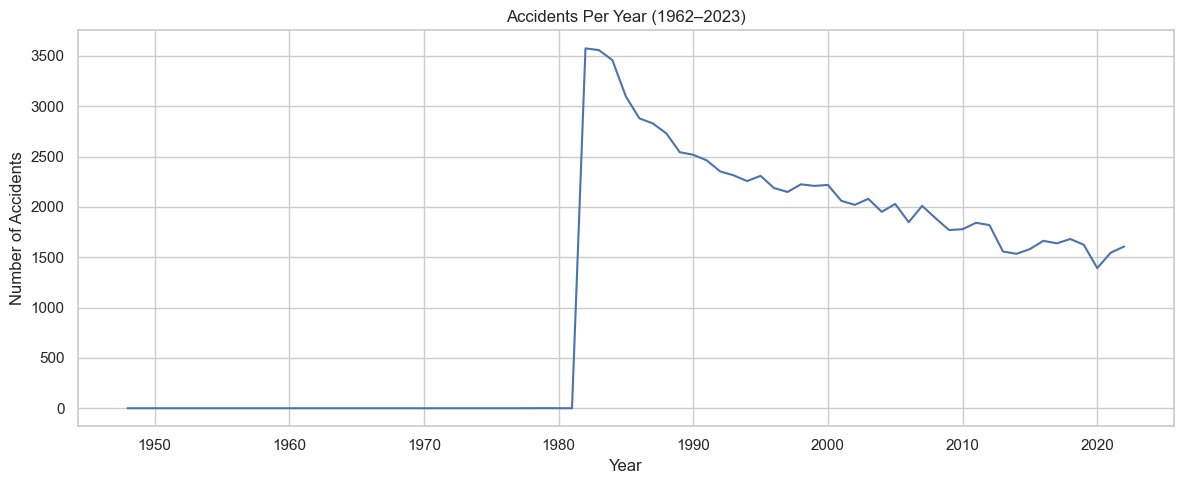

In [21]:
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
df['year'] = df['event_date'].dt.year

# Plot trend
accidents_by_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=accidents_by_year.index, y=accidents_by_year.values)
plt.title('Accidents Per Year (1962–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


Risk by Flight Phase and Weather

In [22]:
print("Risk by Phase:\n", df.groupby('broad_phase_of_flight')['severity_score'].mean().sort_values())
print("Risk by Weather:\n", df.groupby('weather_condition')['severity_score'].mean().sort_values())


Risk by Phase:
 broad_phase_of_flight
Landing        0.468586
Taxi           0.525536
Standing       1.441270
Takeoff        1.933419
Go-around      2.334812
Descent        2.483033
Other          2.537815
Cruise         2.670174
Maneuvering    2.673630
Approach       2.733252
Climb          3.668144
Unknown        3.766515
Name: severity_score, dtype: float64
Risk by Weather:
 weather_condition
VMC        1.740353
Unk        5.057252
IMC        7.113046
Unknown    7.673350
UNK        9.585480
Name: severity_score, dtype: float64


Aircraft Model Risk Analysis

In [23]:
df['make'] = df['make'].str.upper().str.strip()

model_risk = (
    df.groupby(['make', 'model'])
    .agg(accident_count=('model', 'count'),
         avg_severity_score=('severity_score', 'mean'))
    .reset_index()
)

model_risk['combined_risk_score'] = model_risk['accident_count'] * model_risk['avg_severity_score']
model_risk.sort_values(by='combined_risk_score', ascending=False).head(10)


,make,model,accident_count,avg_severity_score,combined_risk_score
3204,BOEING,737,489,10.042945,4911.0
3240,BOEING,737-200,53,55.924528,2964.0
4687,CESSNA,172,1753,1.258985,2207.0
4738,CESSNA,172N,1163,1.751505,2037.0
4663,CESSNA,152,2366,0.843195,1995.0
13553,PIPER,PA-28-140,932,2.045064,1906.0
3495,BOEING,777 - 206,3,534.000000,1602.0
13570,PIPER,PA-28-181,529,2.926276,1548.0
4736,CESSNA,172M,798,1.654135,1320.0
13563,PIPER,PA-28-180,572,2.279720,1304.0


Manufacturer Risk Analysis

In [24]:
manufacturer_risk = (
    df.groupby('make')
    .agg(accident_count=('make', 'count'),
         avg_severity_score=('severity_score', 'mean'))
    .reset_index()
)

manufacturer_risk['combined_risk_score'] = (
    manufacturer_risk['accident_count'] * manufacturer_risk['avg_severity_score']
)

top_10_riskiest = manufacturer_risk.sort_values(by='combined_risk_score', ascending=False).head(10)
bottom_10_safest = manufacturer_risk[manufacturer_risk['accident_count'] > 10]\
    .sort_values(by='combined_risk_score', ascending=True).head(10)


In [25]:
# Create a summary DataFrame: count + average severity
summary = df.groupby('make').agg(
    accident_count=('make', 'count'),
    avg_severity_score=('severity_score', 'mean')
).reset_index()


Visualize Risk Rankings

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17284\3518724359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_riskiest, x='combined_risk_score', y='make', palette='Reds_r')


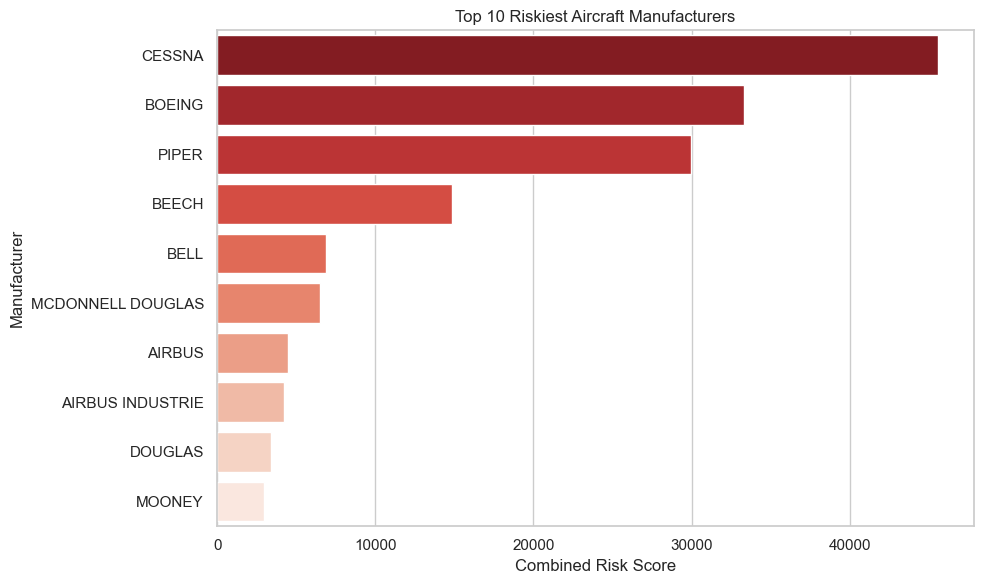

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_riskiest, x='combined_risk_score', y='make', palette='Reds_r')
plt.title('Top 10 Riskiest Aircraft Manufacturers')
plt.xlabel('Combined Risk Score')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17284\389611919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_safest, x='combined_risk_score', y='make', palette='Greens')


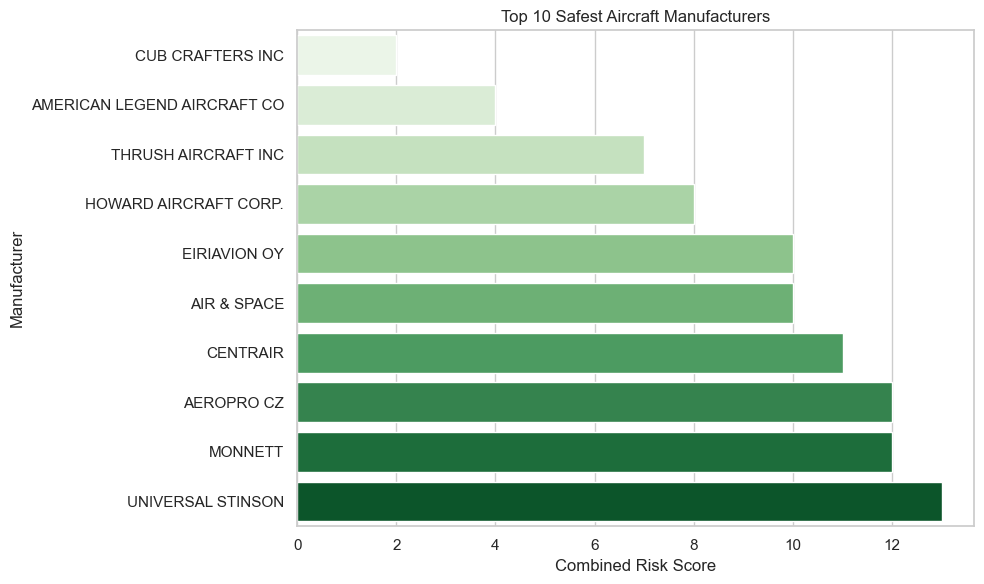

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10_safest, x='combined_risk_score', y='make', palette='Greens')
plt.title('Top 10 Safest Aircraft Manufacturers')
plt.xlabel('Combined Risk Score')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

Accidents Per Year by Make

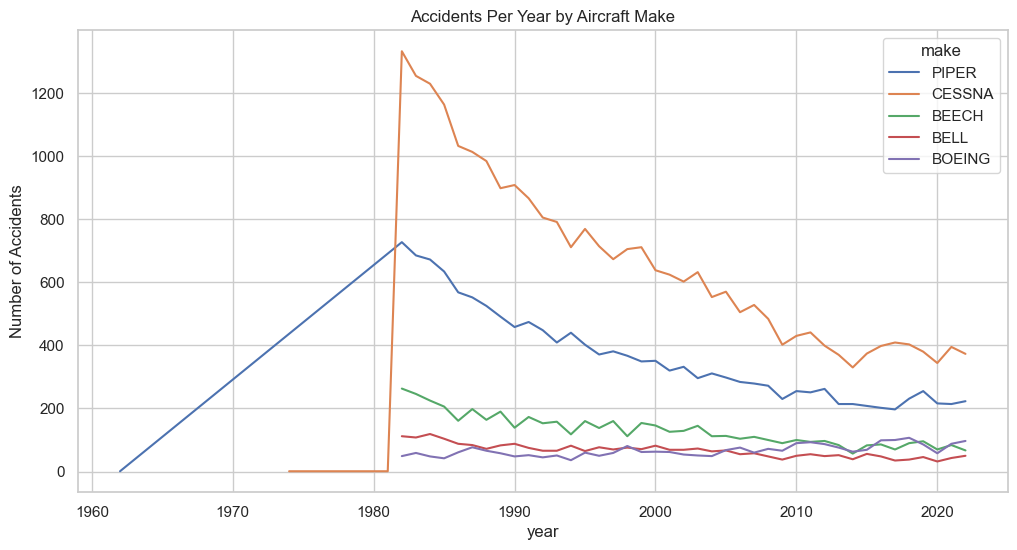

In [28]:
df['year'] = pd.to_datetime(df['event_date'], errors='coerce').dt.year
make_year = df.groupby(['year', 'make'])['severity_score'].count().reset_index()

plt.figure(figsize=(12,6))
top_makes = df['make'].value_counts().head(5).index
sns.lineplot(data=make_year[make_year['make'].isin(top_makes)], x='year', y='severity_score', hue='make')
plt.title('Accidents Per Year by Aircraft Make')
plt.ylabel('Number of Accidents')
plt.show()


In [29]:
df.to_csv("Cleaned_Aviation_Data.csv", index=False)
